# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
Исследуем рынок. У нас есть открытые данные о заведениях общественного питания в Москве.

<a id='content'></a>
**Оглавление**

**[Загрузка данных и подготовка их к анализу](#part_1)**
* [Импортируем библиотеки](#part_1.1)
* [Загрузка датасета, а также проверка данных](#part_1.2)

**[Анализ данных](#part_2)**
* [Исследуем соотношение видов объектов общественного питания по количеству](#part_2.1)
* [Исследуем соотношение сетевых и несетевых заведений по количеству](#part_2.2)
* [Определим для какого вида объекта общественного питания характерно сетевое распространение](#part_2.3)
* [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#part_2.4)
* [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#part_2.5)
* [Выделим в отдельный столбец информацию об улице из столбца address](#part_2.6)
* [Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?](#part_2.7)
* [Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.](#part_2.8)
* [Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Подумаем, какие закономерности можно выявить.](#part_2.9)

**[Вывод](#part_3)**

**[Рекомендации](#part_4)**

**Презентация**
* Презентация в pdf формате: <https://disk.yandex.ru/d/cUNN8ILLQAegmA>

<a id='part_1'></a>
## Загрузка данных и подготовка их к анализу

Для начала импортируем библиотеки **pandas**, **seaborn**, **matplotlib**, **plotly** и прочитаем файлы с данными:  
    **/datasets/rest_data.csv** — данные о заведениях общественного питания Москвы

<a id='part_1.1'></a>
**Импортируем библиотеки**  
[*Назад к оглавлению*](#content)

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import requests

<a id='part_1.2'></a>
**Загрузка датасета, а также проверка данных**  
[*Назад к оглавлению*](#content)

In [2]:
#прочитаем данные таблиц
#выведим таблицу
temp = '/datasets/rest_data.csv'
rest_data = pd.read_csv(temp)
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
#посмотрим общую информацию
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
#проверим дубликаты
rest_data.duplicated().sum()

0

In [5]:
#проверим дубликаты по идентификатору объекта
rest_data['id'].duplicated().sum()

0

In [6]:
#проверим как заполнен тип объекта
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [7]:
#для удоства переименуем предприятие быстрого обслуживания в фастфуд, и магазин (отдел кулинарии) в кулинарию
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
rest_data['object_type'] = rest_data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

Таблица ***rest_data*** содержит информацию о заведениях общественного питания Москвы. 
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.
  
Файл содержит данные по 15366 заведениям из которых описывается по 6 столбцам. Переименовали длиные названия типов короткие. Дубликатов и пропущенных значений нет. Проверка показала, что данные на первый взгляд корректны. Замечаний к ним нет. Можно приступать к анализу данных.

<a id='part_2'></a>
## Анализ данных

<a id='part_2.1'></a>
**Исследуем соотношение видов объектов общественного питания по количеству**  
[*Назад к оглавлению*](#content)

,object_type,id,percent
3,кафе,6099,39.7%
7,столовая,2587,16.8%
6,ресторан,2285,14.9%
8,фаст-фуд,1923,12.5%
0,бар,856,5.6%
1,буфет,585,3.8%
4,кафетерий,398,2.6%
2,закусочная,360,2.3%
5,кулинария,273,1.8%


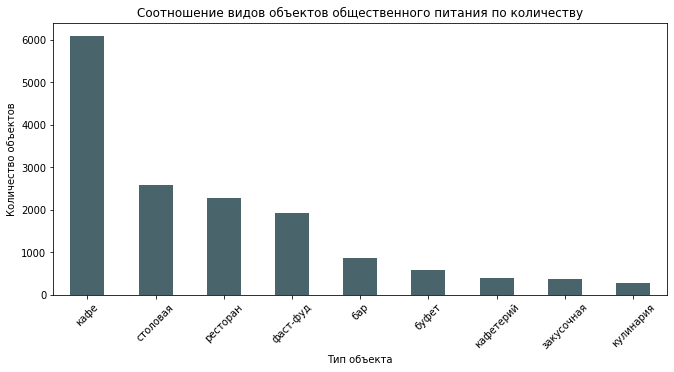

In [8]:
#сгруппируем по типу, посчитаем количество по идентификатору объекта и сделаем сортировку
object_types = (rest_data
                .groupby('object_type', as_index=False)
                .agg({'id':'count'})
                .sort_values(by='id', ascending=False)
               )
#добавим столбец с процентом от общего количества по каждому типу
object_types['percent'] = (object_types['id'] / object_types['id'].sum() * 100).round(1).astype('str') + '%'
display(object_types)
#построим столбчатую диаграмму
object_types.plot(kind='bar', x='object_type', color='#4a646c', figsize=(11,5), legend=False)
plt.xlabel('Тип объекта')
plt.ylabel('Количество объектов')
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xticks(rotation=45)
plt.show()

На диаграмме видно что, наибольшее количество типов объектов общественного питания составляют кафе 39,7%, далее идут столовые 16,8%, рестораны 14,9%, фаст-фуд 12,5%.

<a id='part_2.2'></a>
**Исследуем соотношение сетевых и несетевых заведений по количеству**  
[*Назад к оглавлению*](#content)

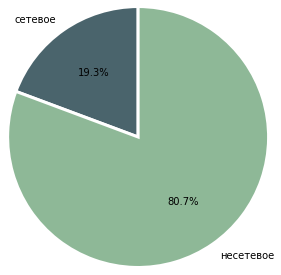

In [9]:
chain_groupby = rest_data.groupby('chain')['object_name'].count().sort_values()

colors = ['#4a646c', '#8EB897']
labels = ['cетевое', 'несетевое']
#нарисуем круговой график
plt.pie(chain_groupby, labels=labels, colors=colors, radius=1.5,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, startangle=90, autopct='%1.1f%%')
plt.show()

Видим из круговой диаграммы - сетевых заведений лишь 19,3% от общего количества, остальные - несетевые

<a id='part_2.3'></a>
**Определим для какого вида объекта общественного питания характерно сетевое распространение**  
[*Назад к оглавлению*](#content)

In [10]:
#сгрупируем данные по сетевым объектам 
chain_object_types = (rest_data[rest_data['chain'] == 'да']
                      .groupby('object_type', as_index=False)
                      .agg({'id':'count'})
                      .sort_values(by='id', ascending=False)
                     )
chain_object_types = (chain_object_types
                      .merge(object_types[['object_type', 'id']], left_on='object_type', right_on='object_type')
                     )
chain_object_types.columns=['object_type', 'chain_objects', 'all_objects']
chain_object_types['percent'] = (chain_object_types['chain_objects'] / chain_object_types['all_objects']*100).round(2).astype('str')+'%'

display(chain_object_types)

,object_type,chain_objects,all_objects,percent
0,кафе,1396,6099,22.89%
1,фаст-фуд,791,1923,41.13%
2,ресторан,544,2285,23.81%
3,кулинария,78,273,28.57%
4,закусочная,56,360,15.56%
5,кафетерий,52,398,13.07%
6,бар,37,856,4.32%
7,буфет,11,585,1.88%
8,столовая,3,2587,0.12%


Сетевое распространение характерно для предприятий быстрого обслуживания 41%.  
В меньше мере оно характерно для магазинов 29% заведений, ресторанов 24% и кафе 23%.

<a id='part_2.4'></a>
**Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**  
[*Назад к оглавлению*](#content)

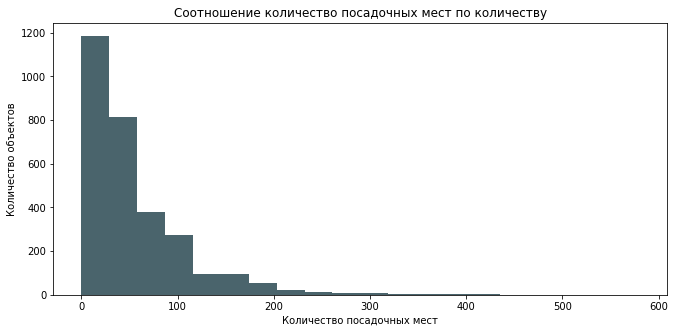

In [11]:
#построим столбчатую диаграмму
rest_data[rest_data['chain'] == 'да']['number'].hist(bins=20, color='#4a646c', grid=False, figsize=(11,5))
plt.title('Соотношение количество посадочных мест по количеству')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество объектов')
plt.show()

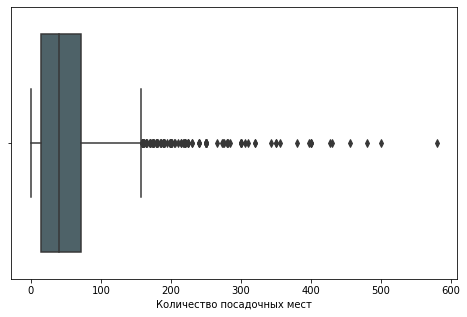

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=rest_data[rest_data['chain'] == 'да']['number'], color='#4a646c')
plt.xlabel('Количество посадочных мест')
plt.show()

In [13]:
rest_data[rest_data['chain'] == 'да']['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.
В большинстве сетей до 100 посадочных мест.

<a id='part_2.5'></a>
**Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?**  
[*Назад к оглавлению*](#content)

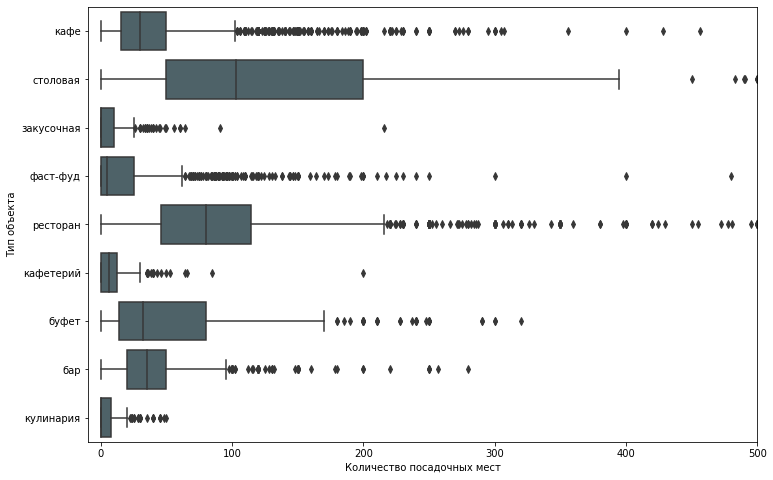

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='number', y='object_type', data=rest_data, color='#4a646c').set_xlim(-10,500)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип объекта')
plt.show()

In [15]:
rest_data.groupby('object_type')['number'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
фаст-фуд,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


В среднем у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в среднем 130.  
Топ-5 типов объектов по количеству посадочных мест:  
130 места - столовая  
96 мест - ресторан    
51 места - буфет  
43 мест - бар  
39 мест - кафе  

<a id='part_2.6'></a>
**Выделим в отдельный столбец информацию об улице из столбца address**  
[*Назад к оглавлению*](#content)

In [16]:
#типы улиц
street_category = ['улица',  'аллея', 'линия', 'квартал', 'мост', 'шоссе', 
'проезд', 'набережная', 'площадь', 'бульвар', 'проспект', 'переулок',
'тупик', 'просека', 'микрорайон', 'поселение']

def street_function(address):
    """
    Функция вытаскивает из адреса улицу
    """
    for address_part in address.split(', '):
        for street in street_category:
            if address_part.lower().find(street)!= -1:
                return address_part

#Добавляем столбец с данными
rest_data['street_name'] = rest_data['address'].apply(street_function)
print('{} строк у которых нет в адресе название улицы'.format(rest_data[rest_data['street_name'].isnull() == True]['address'].count()))
rest_data.head(5)

196 строк у которых нет в адресе название улицы


,id,object_name,chain,object_type,address,number,street_name
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


После выделения улиц из адреса, у нас осталось 196 строк, в которых не указана улица ЯВНО, это поселки и другие загородные адреса.

<a id='part_2.7'></a>
**Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?**  
[*Назад к оглавлению*](#content)

In [17]:
#Данные взяты из открытого источника https://hubofdata.ru/
spreadsheet_id = '1BpK6PNPYxE6K42_0dmI1UDJLbSwFC3Ta66J_ncR-wL4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district['street_name'] = district['address'].apply(street_function)
district.head(5)

,address,adm_district,city_district,lattitude,longitude,street_name
0,"город Москва, улица Егора Абакумова, дом 9",Северо-восточный,Ярославский,55.878996,37.714462,улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",Центральный,Таганский,55.738298,37.673337,улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Центральный,Таганский,55.735528,37.669516,Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Северо-восточный,Лианозово,55.892653,37.573036,Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Северо-восточный,Лианозово,55.904126,37.572181,Абрамцевская улица



Топ-10 улиц с наибольшим количеством заведений:


,street_name,objects
1424,проспект Мира,204
1001,Профсоюзная улица,183
678,Ленинградский проспект,173
984,Пресненская набережная,167
395,Варшавское шоссе,164
681,Ленинский проспект,148
1390,поселение Сосенское,139
1420,проспект Вернадского,132
669,Кутузовский проспект,114
593,Каширское шоссе,112


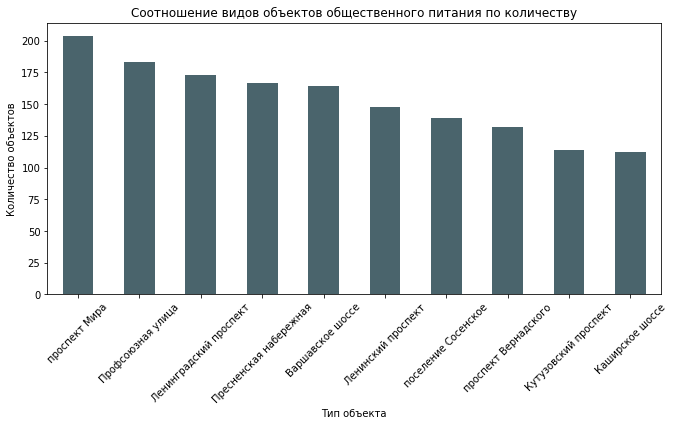

In [18]:
rest_data_str = rest_data[rest_data['street_name'].isnull() == False]

#сгруппируем по типу, посчитаем количество по идентификатору объекта и сделаем сортировку
top_streets = (rest_data_str
                .groupby('street_name', as_index=False)
                .agg({'id':'count'})
                .sort_values(by='id', ascending=False).head(10)
               )
top_streets.columns = ['street_name', 'objects']
print()
print('Топ-10 улиц с наибольшим количеством заведений:')
display(top_streets)
#построим столбчатую диаграмму
top_streets.plot(kind='bar', x='street_name', color='#4a646c', figsize=(11,5), legend=False)
plt.xlabel('Тип объекта')
plt.ylabel('Количество объектов')
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xticks(rotation=45)
plt.show()

In [19]:
top_streets_merged = top_streets.merge(district[['street_name', 'city_district', 'adm_district']], left_on='street_name', right_on='street_name')
streets = pd.DataFrame(data=top_streets_merged['street_name'].unique(), columns=['street_name'])

def areas(row, data):
    result = data[data['street_name']==row['street_name']]['city_district'].to_list()
    return result

top_streets['areas'] = top_streets.apply(areas, args=[top_streets_merged], axis=1)

for index in range(10):
    print()
    print(top_streets.iloc[index, 0])
    print(np.unique(top_streets.iloc[index, 2]))



проспект Мира
['Алексеевский' 'Мещанский' 'Останкинский' 'Ростокино' 'Свиблово'
 'Ярославский']

Профсоюзная улица
['Академический' 'Коньково' 'Обручевский' 'Теплый Стан' 'Черемушки'
 'Ясенево']

Ленинградский проспект
['Аэропорт' 'Беговой' 'Сокол' 'Хорошевский']

Пресненская набережная
['Пресненский']

Варшавское шоссе
['Донской' 'Нагатино-Садовники' 'Нагорный' 'Новомосковский'
 'Чертаново Северное' 'Чертаново Центральное' 'Чертаново Южное'
 'Южное Бутово']

Ленинский проспект
['Гагаринский' 'Донской' 'Ломоносовский' 'Обручевский'
 'Проспект Вернадского' 'Теплый Стан' 'Тропарево-Никулино' 'Якиманка']

поселение Сосенское
['Новомосковский']

проспект Вернадского
['Гагаринский' 'Ломоносовский' 'Новомосковский' 'Проспект Вернадского'
 'Раменки' 'Тропарево-Никулино']

Кутузовский проспект
['Дорогомилово' 'Фили-Давыдково']

Каширское шоссе
['Москворечье-Сабурово' 'Нагатино-Садовники' 'Нагатинский Затон'
 'Орехово-Борисово Северное' 'Орехово-Борисово Южное']


<a id='part_2.8'></a>
**Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.**  
[*Назад к оглавлению*](#content)

In [20]:
groupby_streets = rest_data_str.groupby('street_name', as_index=False).agg({'object_name':'count'})
streets_with_one_object = groupby_streets[groupby_streets['object_name']==1]
print('Всего улиц с 1 объектом общественного питания:', streets_with_one_object['object_name'].sum())

streets_with_one_object_merged = streets_with_one_object.merge(district[['street_name', 'city_district']], left_on='street_name', right_on='street_name')
print('Районы, в которых находятся ,больше всего улиц с 1 объектом общественного питания:')
streets_with_one_object_merged['city_district'].value_counts().head(10)

Всего улиц с 1 объектом общественного питания: 534
Районы, в которых находятся ,больше всего улиц с 1 объектом общественного питания:


Таганский         28
Хамовники         26
Басманный         22
Пресненский       20
Тверской          20
Марьина роща      17
Лефортово         12
Соколиная Гора    12
Замоскворечье     12
Мещанский         12
Name: city_district, dtype: int64

<a id='part_2.9'></a>
**Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Подумаем, какие закономерности можно выявить.**  
[*Назад к оглавлению*](#content)

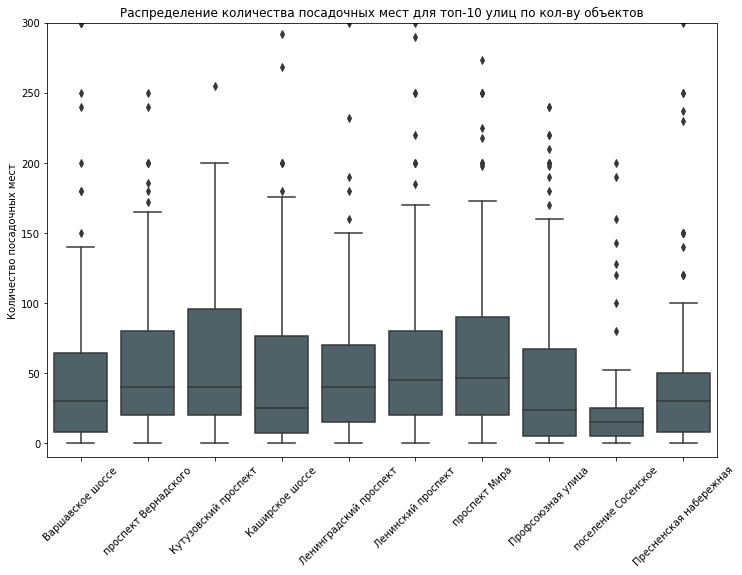

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 32.0
Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40.0


In [21]:
top_streets_list = top_streets['street_name'].to_list()
top_streets_rest_data = rest_data.query('street_name in @top_streets_list')
not_top_streets_rest_data = rest_data.query('street_name not in @top_streets_list')


plt.figure(figsize=(12,8))
sns.boxplot(x='street_name', y='number', data=top_streets_rest_data, color='#4a646c', orient='v').set_ylim(-10,300)
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.xlabel('')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=45)
plt.show()

print('Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов:', top_streets_rest_data['number'].describe()[5])
print('Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов:', not_top_streets_rest_data['number'].describe()[5])

<a id='part_3'></a>
## Вывод
[*Назад к оглавлению*](#content)

Таблица rest_data содержит информацию о заведениях общественного питания Москвы. Так же понадобились данные по улицам Москвы с указанием района, данный взяты из открытого источника https://hubofdata.ru/

id — идентификатор объекта;
object_name — название объекта общественного питания;
chain — сетевой ресторан;
object_type — тип объекта общественного питания;
address — адрес;
number — количество посадочных мест.
Файл содержит данные по 15366 заведениям из которых описывается по 6 столбцам. Переименовали длиные названия типов короткие. Дубликатов и пропущенных значений нет. Проверка показала, что данные на первый взгляд корректны. Замечаний к ним нет. Можно приступать к анализу данных.

Проанализировав данные, выяснили, что наибольшее количество типов объектов общественного питания составляют кафе 39,7%, далее идут столовые 16,8%, рестораны 14,9%, фаст-фуд 12,5%.

Так же сетевых заведений 19,3% от общего количества, остальные - несетевые.
Сетевое распространение характерно для предприятий быстрого обслуживания (41% заведений данного типа). В меньше мере оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений). Как правило для сетевых заведений характерно - мало заведений с большим количеством посадочных мест. В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем.

В среднем у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в среднем 103.
Топ-5 типов объектов по количеству посадочных мест:  
130 места - столовая  
96 мест - ресторан  
51 места - буфет  
43 мест - бар  
39 мест - кафе  

5-ка районов, в которых находятся ,больше всего улиц с 1 объектом общественного питания:
Таганский, улиц 28  
Хамовники, улиц 26  
Басманный, улиц 22  
Тверской, улиц 20  
Пресненский, улиц 20  

***Топ-10 улиц с наибольшим количеством заведений:***
проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, поселение Сосенское, проспект Вернадского, Кутузовский проспект, Каширское шоссе	

Так же у нас есть список районов, в которых располагаются топ-10 улиц по кол-ву объектов общественного питания. Всего улиц с одним объектом общественного питания 534.

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 32 Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40. Разницы между количествами посадочных мест НЕТ.

<a id='part_4'></a>
## Рекомендации
[*Назад к оглавлению*](#content)

Сложно дать какие-то рекомендации без обратной связи и бОльшей информации от инвесторов и учредителей. Можно отталкиваться от того, что на рынке более популярны кафе (предполагаем, что раз их больше, то они более популярны, но не факт), потому именно такой тип заведения и рекомендовать со средним количеством посадочных мест на 30 персон. Касаемо района и улиц, то предполагаем что объект лучше размещать на одной из топ-10 улиц, ведь не спроста на этих улицах наибольшее количество объектов. Но эта логика тоже не совсем точна, так как все-таки самое важное - это проходимость объекта, преобладающая каста людей в радиусе в зависимости от портрета клиента. 

Нужно обратить внимание на перспективные районы с малым количеством заведений на текущий момент. Желательно учитывать по текущим объектам расстояния до метро, какое метро, средние чеки в заведениях. Так же желательно выделить наиболее интересные здания для размещения заведений - высотки, исторические здания, топовые отели и гостиницы. Плюс желательно подумать об иностранных туристах заранее, ведь можно примерно сказать, где они проводят большую часть времени в Москве.  
Необходимо понимать, что с выбором места размещения объекта есть множество нюансов, например, если инвесторы всё-таки склонятся к меньшим затратам и более быстрой окупаемости, то возможно выберут тип объекта - столовую с не столь большими вложениями, оформленную необычным способом. В таком случае необходимо будет проводить анализ по расположению бизнес центров, учебных заведений и других крупных объектов с большим количеством людей, готовых заходить в наше потенциальное заведение на бизнес-ланчи. Плюс, выбирая улицы с наибольшим количеством объектов для потенциального размещения заведения, можно не учесть новые перспективные районы.

Наше исследование получилось очень поверхностным. Если бы мы использовали api яндекс геокодера, то смогли бы расположить все заведения на карте и общая картина была бы видна лучше)